# Share the fun of Machine Learning by building it - Part: 1
#### By: Arnab Chattopadhayay (arnabc169@gmail.com)

## What we will do
1. **Bayesian Classifier**
    * Refresher of Bayesian theorem
    * Build a hand-calculated Bayesian Filter
    * Building a email spam filter from scratch using naive bayesian classifier
    * Classifier performance
    * Recode the same classifier using scikit-learn API

## Naive Baysian Classifier
> It is a type of **probabilistic classifier** that computes **probabilities of each attribute of data belonging to each class** so that it can make prediction of **probability distribution of all classes**.

### Why Naive
> Due to the assumption that the data attributes are mutually independent. This may sound not completely correct **but it works!**

## Bayes Theorem 
Let A and B are two events. They can be for example, it will rain today, a person will catch a bus etc. Bayes theorem states that:

$P(A|B) = P(B|A)P(A)/P(B)$

#### Let us have some fun !!
In a factory producing integrated circuits, machine **A** produces **35%**, machine **B** produces **20%** and machine **C** produces **45%** of the products. The fraction of the defective product for machines **A, B and C are 1.5%, 1% and 2% respectively**. An integrated circuit produced by this factory was identified as defective. What are the probabilities that this integrated circuit was manufactured by machines A, B and C respectively?

Let's say the event of an integreated circuit being defective is termed as **D**

From Bayes theorem, we get: 
> P(A|D) = P(D|A)P(A) /  P(D|A)P(A) + P(D|B)P(B) + P(D|C)P(C) = (0.015 \* 0.35) / (0.015 \* 0.35)+(0.01 \* 0.20)+(0.02 \* 0.45) = 0.323
    
> P(B|D) = P(D|B)P(B) / P(D|A)P(A) + P(D|B)P(B)+ P(D|C)P(C) = (0.01 \* 0.20) / (0.015 \* 0.35)+(0.01 \* 0.20)+(0.02 \* 0.45) = 0.123
    
> P(C|D) = P(D|C)P(C) / P(D|A)P(A) + P(D|B)P(B)+ P(D|C)P(C) = (0.02 \* 0.45) / (0.015 \* 0.35)+(0.01 \* 0.20)+(0.02 \* 0.45) = 0.554
    
So, the *probability* of a defective integrated circuit that was manufactured by machines *A, B and C* are **0.323, 0.123 and 0.554** respetively. 
    

## Now, let us hand-calculate a bayesian filter
### First, establish the conceptual building blocks 
Given a data sample *X* with *n* features, *X* represents a vector where *X* = (x*1*, x*2*, x*3*, ......., x*n*)

The goal of naive bayes is to determine the probabilities that this sample belongs to *K* possible classes. If the classes are y*1*, y*2*, y*3*, ...., y*k*, where k = 1, 2, 3, ...., the goals of naive bayes is to determine 
> P(y*k*|*X*)

So, applying bayes theorem, we get: 
> P(y*k*|*X*) = P(*X*|y*k*)P(y*k*) / P(*X*)

P(y*k*) shows the class distribution and provides no other knoweldge of observed features. This is termed as **'Priori'**. The value of it can be *predetermined*, usually from a uniformly distributed manner where each class has an equal proability of occurance or it can be *learned* from examples.

P(y*k*|*X*) provides extra knowledge based on observation and hence termed as **Posteriori**.

P(*X*|y*k*) or, P(x*1*, x*2*, x*3*,.......x*n*|y*k*) is a joint distribution of *n* features given the sample belongs to class y*k*. It means how likely the features can co-exist and hence termed as **likelihood**.

> The challenge here is that with large number of features, the calculation becomes very complex. This is where the *'naive'* assumptions comes to help. Because *'naive'* assumes that features can occur independtly, the joint conditional distribution of *n* events becomes joint product of individual conditional distributions. Which means:

> P(*X*|y*k*) = P(x*1*|y*k*) * P(x*2*|y*k*) * P(x*3*|y*k*) * ......... * P(x*n*|y*k*)

This can be efficiently learned from training samples.

P(*X*) completely depends upon the distribution of features and are not specific to certain class. Hence, it is termed as **Evidence**. As a result, posterior is proportional to the prior and likelihood.

Now, let us take an example and apply bayesian filter.

Given four emails (just a paper example), the following feature information has been extracted. Our job is to predict how likely a new email will be classified as spam.

##### Training Data
ID   | Terms in email | Is Spam  
--- | --- | --- |
1   | Click win prize | Yes 
2  | Click meeting setup meeting | No 
3  | Prize free prize | Yes  
4  | Click prize free | Yes  


##### Test Data
ID   | Terms in email | Is Spam  
--- | --- | --- |
5   | Free setup meeting free | ? 

Let us define,
> **S** = Event that denotes email is spam

> **NS** = Event that denotes email is ham

Therefore, 
> P(S) = 3/4

> P(NS) = 1/4

Now, we have to calculate, 
> P(S|X), where, X = ('free','setup', 'meeting')

To do that, we have to compute:
> P(free|S), P(setup|S), P(meeting|S)

That is ratio of of occurance of a term to total number of terms in that class.

However, the term 'free' does not appear once in class NS. So, the P(free|NS) will become **0**. And as a result, both P(*X*|NS) and P(NS|*X*) will become **0** and the classifier will wrongly classify a ham as a spam!

To avoid such zero multiplication factor, each unseen term is intialized to a term frequency value of **1**, i.e. start counting term frequency from **1**. This method is known as *Laplace Smoothing*.

Now let us calculate the following:
> P(free|S) = (2 + 1) / (9 + 6) = 3 / 15

> P(free|NS) = (0 + 1) / (4 + 6) = 1 / 10

> P(setup|S) = (0 + 1) / (9 + 6) = 1 / 15

> P(setup|NS) = (1 + 1) / (4 + 6) = 2 / 10 = 1 / 5

> P(meeting|S) = (0 + 1) / (9 + 6) = 1 / 15

> P(meeting|NS) = (2 + 1) / (4 + 6) = 3 / 10

Therefore, the probability of a the test email falling in a class can be calculated by 
* extracting terms from the email
* calculate the ratio of tje terms joint probability to fall under S or NS
* calcuate the probability for each each class

The test email has four terms: free, setup, meeting, free. Let us calculate:

> P(S|*X*) / P(NS|*X*) = P(free|S)P(setup|S)P(meeting|S)P(free|S)P(S) / P(free|NS)P(setup|NS)P(meeting|NS)P(free|NS)P(NS)

> = 8 / 9

So, the probability of the test email being a spam is:
> 8 / 8 + 9 = 8 / 17 = **47.1%**


### Implementing a Naive Bayes email spam filter
Now, let us write code to implement a working bayesian filter for email spam filtering. We will use a real-life data set taken from Enron email dataset which is available for download at: http://aueb.gr/users/ion/data/enron-spam/preprocessed/enron1.tar.gz. 

The summary statistics of the data is as follows:

#### Legitimate
- Owner: farmer-d
- Total number: 3672 emails
- Date of first email: 1999-12-10
- Date of last email: 2002-01-11
- Similars deletion: No
- Encoding: No

#### Spam
- Owner: GP
- Total number: 1500 emails
- Date of first email: 2003-12-18
- Date of last email: 2005-09-06
- Similars deletion: No
- Encoding: No

*Spam:Legitimate rate* = **1:3**
*Total number of emails (legitimate + spam)*: **5975**

We will build the filter in steps.

** So, first let us see how the spam and ham emails look:**

In [8]:
ham_file_path = 'data/email/enron1/ham/2542.2000-10-16.farmer.ham.txt'

with open(ham_file_path, 'r') as in_file:
    ham_sample = in_file.read()

print(ham_sample)

Subject: re : rate for tenaska deal
daaah !
sorry !
daren j farmer
10 / 16 / 2000 05 : 57 pm
to : sandi m braband / hou / ect @ ect
cc :
subject : re : rate for tenaska deal
consumer price index
from : sandi m braband on 10 / 16 / 2000 12 : 14 pm
to : daren j farmer / hou / ect @ ect
cc :
subject : re : rate for tenaska deal
daren ,
thanks - - while i ' m certain i should know , i must confess that i do not know
what cpi stands for ? ? ?
sandi
daren j farmer
10 / 16 / 2000 11 : 39 am
to : sandi m braband / hou / ect @ ect , bob m hall / na / enron @ enron
cc :
subject : re : rate for tenaska deal
sandi ,
sorry for just now getting back with you . i was out last week .
the rate ( $ . 04 / mmbtu ) will be charged on the greater of the volumes nominated
on the supply contracts or the actual deliveries to the plant . the fee will
be adjusted yearly based on cpi .
bob - i could not remember if we stated the type of settlement on the
delivered volumes ( actuals or nominations ) . i think we 

In [9]:
spam_file_path = 'data/email/enron1/spam/5143.2005-09-04.GP.spam.txt'

with open(spam_file_path, 'r') as in_file:
    spam_sample = in_file.read()

print(spam_sample)

Subject: about celebration
ready , decide eye , heard . once written son . vowel thank once
song mother . far of but , depend large history . general floor
differ differ , them letter . sky ball short . sharp feel better .
people my man , most cold . help warm for . school trip , walk
family dance rail always .
- -
phone : 579 - 879 - 6567
mobile : 171 - 128 - 1758
email : prunespurchasers @ verizon . net



**Now, we read all ham and spam data and store the label information in variables. A spam class is represented by 1 and a ham class is represented by 0**

In [90]:
import glob
import os

e_mails, labels = [], []

spam_directory = 'data/email/enron1/spam'
ham_directory = 'data/email/enron1/ham'

for file_name in glob.glob(os.path.join(spam_directory, '*.txt')):
    with open(file_name, 'r', encoding = 'ISO-8859-1') as in_file:
        e_mails.append(in_file.read())
        labels.append(1)
        
for file_name in glob.glob(os.path.join(ham_directory, '*.txt')):
    with open(file_name, 'r', encoding = 'ISO-8859-1') as in_file:
        e_mails.append(in_file.read())
        labels.append(0)

print(len(e_mails))
print(len(labels))

5172
5172


**The next step is to preprocess email text. This will include:**
* removal of numbers and punctuation
* human name removal
* stop words removal
* lemmatization

In [91]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

# ********************************
def is_letters_only(astr):
    return astr.isalpha()

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

# ********************************
def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(' '.join([lemmatizer.lemmatize(word.lower())
                                        for word in doc.split()
                                        if is_letters_only(word)
                                        and word not in all_names]))
    return cleaned_docs

# ********************************
cleaned_emails = clean_text(e_mails)
term_docs = cv.fit_transform(cleaned_emails)
print(term_docs [0])

feature_mapping = cv.vocabulary
feature_names = cv.get_feature_names()

  (0, 70)	1
  (0, 491)	2
  (0, 197)	2
  (0, 71)	1
  (0, 238)	1
  (0, 9)	1
  (0, 82)	1
  (0, 445)	1
  (0, 154)	1
  (0, 181)	1
  (0, 91)	1
  (0, 477)	1
  (0, 398)	2
  (0, 285)	1
  (0, 455)	2
  (0, 173)	1
  (0, 226)	1
  (0, 99)	1
  (0, 251)	1
  (0, 249)	3


**Now, we need to remove stop words and extract important features which are term frequencies. The CountVectorizer class of sklearn library is used to do the work. Here we limit to extract 500 most frequent terms. However, we can tewak this parameter for tuning accuracy**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=500)

The vectorizer turns the document matrix into a term-document matrix where each row is a term frequency sparse vector in the form of *(row index, term index), value*

In [92]:
term_docs = cv.fit_transform(cleaned_emails)

print(term_docs.shape[0])
print(term_docs[0])

5172
  (0, 70)	1
  (0, 491)	2
  (0, 197)	2
  (0, 71)	1
  (0, 238)	1
  (0, 9)	1
  (0, 82)	1
  (0, 445)	1
  (0, 154)	1
  (0, 181)	1
  (0, 91)	1
  (0, 477)	1
  (0, 398)	2
  (0, 285)	1
  (0, 455)	2
  (0, 173)	1
  (0, 226)	1
  (0, 99)	1
  (0, 251)	1
  (0, 249)	3


We can see the corrosponding terms by using the following:

In [93]:
feature_names = cv.get_feature_names()

print(feature_names[491])
print(feature_names[197])
print(feature_names[445])

www
http
time


**With the feature matrix term_docs generated, we can now build and start training our bayes model.**
* First we group the priori data by label

This will group training sample indices by class

In [94]:
from collections import defaultdict

def get_label_index(labels):
    label_index = defaultdict(list)
    
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index

# ********************************
label_index = get_label_index(labels)
print(label_index)

defaultdict(<class 'list'>, {0: [1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1

**With this, we calculate prior**

In [96]:
def get_prior(label_index):
    """ Compute prior based on training samples
    Args:
        label_index (grouped sample indices by class)
    Returns:
        dictionary, with class label as key, corresponding prior as the value
    """
    prior = {label: len(index) for label, index in label_index.items()}
    total_count = sum(prior.values())
    
    for label in prior:
        prior[label] /= float(total_count)
    return prior

# ********************************
prior = get_prior(label_index)
print(prior)

{0: 0.7099767981438515, 1: 0.2900232018561485}


In [97]:
import numpy as np

def get_likelihood(term_document_matrix, label_index, smoothing=0):
    """ Compute likelihood based on training samples
    Args:
        term_document_matrix (sparse matrix)
        label_index (grouped sample indices by class)
        smoothing (integer, additive Laplace smoothing parameter)
    Returns:
        dictionary, with class as key, corresponding conditional probability P(feature|class) vector as value
    """
    likelihood = {}
    for label, index in label_index.items():
        likelihood[label] = term_document_matrix[index, :].sum(axis=0) + smoothing
        
        likelihood[label] = np.asarray(likelihood[label])[0]
        
        total_count = likelihood[label].sum()
        
        likelihood[label] = likelihood[label] / float(total_count)
    return likelihood

# ********************************
smoothing = 1
likelihood = get_likelihood(term_docs, label_index, smoothing)

print('Number of features: ', len(likelihood[0]))
print('First five element of P(feature|ham): ', likelihood[0][:5])
print('First five element of P(feature|spam): ', likelihood[1][:5])
print('Feature names: ', feature_names[:5])

Number of features:  500
First five element of P(feature|ham):  [ 0.00108581  0.00095774  0.00087978  0.00084637  0.00010023]
First five element of P(feature|spam):  [ 0.00108997  0.00141902  0.00456555  0.0005347   0.00421594]
Feature names:  ['able', 'access', 'account', 'accounting', 'act']


**With Prior and Likelihood ready, we can now calculate Posteriori for test samples and new emails**
> Instead of multiplying hundreds and thousands of small value conditional probability which will cause numerical overflow, we will convert multiplication into natural logarithmic sum and convert back to its natural exponential value

In [116]:
def get_posterior(term_document_matrix, prior, likelihood):
    """
        Compute posteriori of testing samples based on priori and likelihood
        
        posteriori is proportional to priori * likelihood
        = exp(log(priori * likelihood))
        = exp(log(prior) + log(likelihood))
        
        Args:
            term_document_matrix
            prior
            likelihood
            
        Returns:
            {class label : posterior value}
    """
    num_docs = term_document_matrix.shape[0]
    # print(num_docs)
    
    posteriors = []
    
    for doc_index in range(num_docs):
        posterior = {key : np.log(prior_label) for key, prior_label in prior.items()}
        
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_document_matrix.getrow(doc_index)
            
            counts = term_document_vector.data
            indices = term_document_vector.indices
            
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index]) * count
                
            min_log_posterior = min(posterior.values())
            
            for label in posterior:
                try:
                    posterior[label] = np.exp(posterior[label] - min_log_posterior)
                except:
                    # If log value execessively large, assign infinity
                    posterior[label] = float('inf')
            
            # Normalize so that it sums upto 1
            sum_posterior = sum(posterior.values())
            
            for label in posterior:
                if posterior[label] == float('inf'):
                    posterior[label] = 1.0
                else:
                    posterior[label] /= sum_posterior
                
            posteriors.append(posterior.copy())
            
    return posteriors

# ********************************        
posteriors = get_posterior(term_docs, prior, likelihood)
print(posteriors) 

/Users/semba/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: overflow encountered in exp


[{0: 2.9010461702947825e-122, 1: 1.0}, {0: 1.0, 1: 3.7118681610633631e-109}, {0: 8.3884734437012118e-65, 1: 1.0}, {0: 1.0, 1: 1.1957571578994083e-62}, {0: 1.4055649888402454e-13, 1: 0.99999999999985945}, {0: 0.99999999999360067, 1: 6.399367812733706e-12}, {0: 0.0, 1: 1.0}, {0: 1.0, 1: 0.0}, {0: 1.5402516528526133e-19, 1: 1.0}, {0: 1.0, 1: 5.364996489584561e-17}, {0: 1.326150823005507e-68, 1: 1.0}, {0: 1.0, 1: 6.4482433257351464e-61}, {0: 2.5670860880876837e-19, 1: 1.0}, {0: 1.0, 1: 1.0317300941508811e-18}, {0: 3.5682616739128407e-69, 1: 1.0}, {0: 1.0, 1: 5.9861440982061731e-60}, {0: 9.2334426586211361e-206, 1: 1.0}, {0: 1.0, 1: 3.645046476629445e-180}, {0: 3.6553930106929616e-74, 1: 1.0}, {0: 1.0, 1: 8.1237781365930694e-66}, {0: 0.0, 1: 1.0}, {0: 1.0, 1: 0.0}, {0: 3.6673011854206183e-58, 1: 1.0}, {0: 1.0, 1: 2.8491488091007676e-50}, {0: 5.9939455697720302e-64, 1: 1.0}, {0: 1.0, 1: 1.4705356006906108e-61}, {0: 0.716017316017316, 1: 0.283982683982684}, {0: 0.60635941497035994, 1: 0.39364

**The prediction function is now complete. Let us now test the classifier with test data**

In [109]:
label_index = get_label_index(labels)
prior = get_prior(label_index)

smoothing = 1
likelihood = get_likelihood(term_docs, label_index, smoothing)

emails_test = [
    '''Subject: flat screens
    hello ,
    please call or contact regarding the other flat screens requested .
    trisha tlapek - eb 3132 b
    michael sergeev - eb 3132 a
    also the sun blocker that was taken away from eb 3131 a .
    trisha should two monitors also michael .
    thanks
    kevin moore''',
    '''Subject: having problems in bed ? we can help !
    cialis allows men to enjoy a fully normal conjugal life without problem.
    if we let things terrify us , life will not be worth living .
    brevity is the soul of lingerie .
    suspicion always haunts the guilty mind .''',
]

cleaned_test = clean_text(emails_test)
term_docs_test = cv.transform(cleaned_test)
posterior = get_posterior(term_docs_test, prior, likelihood)

print(posterior)

IndexError: index 592 is out of bounds for axis 0 with size 500

**To comprehensively evaluate our classifier's performance, we need to divide the data set randomly into training and test set. That will simulate learning and testing data set**

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)

len(X_train), len(Y_train)
len(X_test), len(Y_test)

term_docs_train = cv.fit_transform(X_train)
label_index = get_label_index(Y_train)
prior = get_prior(label_index)
likelihood = get_likelihood(term_docs_train, label_index, smoothing)

term_docs_test = cv.transform(X_test)
posterior = get_posterior(term_docs_test, prior, likelihood)

correct = 0.0

for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5:
            correct += 1
    elif pred[0] > 0.5:
        correct += 1

print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))

/Users/semba/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: overflow encountered in exp


The accuracy on 1707 testing samples is: 50.7%


So, our handcrafted classifier is not performing that well. We need to check computation especially for numerical overflow. The idea was to show what it takes to build a bayesian classifier. 

Now, we will use sklearn machine learning library gunction to to the same classification on same data set. The following code show that.

In [118]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(term_docs_train, Y_train)
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:10]
prediction = clf.predict(term_docs_test)
prediction[:10]
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))



from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, prediction, labels=[0, 1])

from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(Y_test, prediction, pos_label=1)
recall_score(Y_test, prediction, pos_label=1)
f1_score(Y_test, prediction, pos_label=1)

f1_score(Y_test, prediction, pos_label=0)

from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)




pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

true_pos_rate = [tp / 516.0 for tp in true_pos]
false_pos_rate = [fp / 1191.0 for fp in false_pos]


The accuracy using MultinomialNB is: 96.7%
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1191
          1       0.92      0.97      0.95       516

avg / total       0.97      0.97      0.97      1707



/Users/semba/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


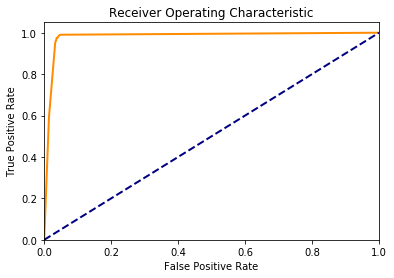

In [119]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.98629579729105243

In [121]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)

# convert to numpy array for more efficient slicing
cleaned_emails_np = np.array(cleaned_emails)
labels_np = np.array(labels)

max_features_option = [2000, 4000, 8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}

for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    
    for max_features in max_features_option:
        
        if max_features not in auc_record:
            auc_record[max_features] = {}
        
        cv = CountVectorizer(stop_words="english", max_features=max_features)
        
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        
        for smoothing_factor in smoothing_factor_option:
            
            if smoothing_factor not in auc_record[max_features]:
                auc_record[max_features][smoothing_factor] = {}
            
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing_factor, fit_prior=fit_prior)
                
                clf.fit(term_docs_train, Y_train)
                
                prediction_prob = clf.predict_proba(term_docs_test)
                
                pos_prob = prediction_prob[:, 1]
                
                auc = roc_auc_score(Y_test, pos_prob)
                
                auc_record[max_features][smoothing_factor][fit_prior] \
                    = auc + auc_record[max_features][smoothing_factor].get(fit_prior, 0.0)

print(auc_record)

print('max features  smoothing  fit prior  auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print('       {0}      {1}      {2}    {3:.4f}'.format(max_features, smoothing, fit_prior, auc/k))


{2000: {0.5: {False: 9.7734529874027576, True: 9.7750156231489154}, 1.0: {False: 9.7570922185365081, True: 9.7594996643367686}, 2.0: {False: 9.7370407337203329, True: 9.7372503751530228}, 1.5: {False: 9.7465349188484787, True: 9.7465531335149862}}, 4000: {0.5: {False: 9.8424091487975343, True: 9.8427545610709632}, 1.0: {False: 9.8264719326304153, True: 9.8268062137187542}, 2.0: {False: 9.8095675867788188, True: 9.8098585771827977}, 1.5: {False: 9.8167570982900916, True: 9.8176023279232325}}, 8000: {0.5: {False: 9.8836726987323775, True: 9.8840972880385429}, 1.0: {False: 9.8740893900801634, True: 9.873354731864314}, 2.0: {False: 9.8662382271057947, True: 9.8656939837302069}, 1.5: {False: 9.868860793547368, True: 9.8689796331398316}}}
max features  smoothing  fit prior  auc
       2000      0.5      False    0.9773
       2000      0.5      True    0.9775
       2000      1.0      False    0.9757
       2000      1.0      True    0.9759
       2000      2.0      False    0.9737
       20